<a href="https://colab.research.google.com/github/ngocthien2409/Python_RFM_Analysis/blob/main/finalprj_python_HNT24.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files

In [ ]:
uploaded = files.upload() # upload file excel into colab to explore

Saving ecommerce retail.csv to ecommerce retail.csv
Saving segmentation.xlsx to segmentation.xlsx


In [ ]:
import pandas as pd
retail = pd.read_csv('ecommerce retail.csv')
retail.info() # check if there is any unsual data in the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [ ]:
retail.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [ ]:
retail['InvoiceDate'] = pd.to_datetime(retail['InvoiceDate']) # convert column 'InvoiceDate' to datetime type

In [ ]:
retail = retail.dropna(subset= ['CustomerID'], axis = 0).drop_duplicates() # drop duplicates value in the column 'CustomerID'


In [ ]:
retail.info() # check again

<class 'pandas.core.frame.DataFrame'>
Int64Index: 401604 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    401604 non-null  object        
 1   StockCode    401604 non-null  object        
 2   Description  401604 non-null  object        
 3   Quantity     401604 non-null  int64         
 4   InvoiceDate  401604 non-null  datetime64[ns]
 5   UnitPrice    401604 non-null  float64       
 6   CustomerID   401604 non-null  float64       
 7   Country      401604 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.6+ MB


In [ ]:
retail['CustomerID'] = retail['CustomerID'].astype(int) # convert column 'CustomerID' to data type integer

In [ ]:
import pandas as pd
retail = retail[(retail['Quantity'] > 0) &(retail['UnitPrice'] > 0)& (retail['Country'] == 'United Kingdom')]
retail.info() # filter data

<class 'pandas.core.frame.DataFrame'>
Int64Index: 349203 entries, 0 to 541893
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    349203 non-null  object        
 1   StockCode    349203 non-null  object        
 2   Description  349203 non-null  object        
 3   Quantity     349203 non-null  int64         
 4   InvoiceDate  349203 non-null  datetime64[ns]
 5   UnitPrice    349203 non-null  float64       
 6   CustomerID   349203 non-null  int64         
 7   Country      349203 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(4)
memory usage: 24.0+ MB


In [ ]:
retail['InvoiceDate'].dtype

dtype('<M8[ns]')

In [ ]:
retail['TransactionAmount'] = retail['UnitPrice'] * retail['Quantity'] # calculate TransactionAmount

In [ ]:
data = retail[['CustomerID', 'InvoiceNo', 'InvoiceDate', 'TransactionAmount']]
data

,CustomerID,InvoiceNo,InvoiceDate,TransactionAmount
0,17850,536365,2010-12-01 08:26:00,15.30
1,17850,536365,2010-12-01 08:26:00,20.34
2,17850,536365,2010-12-01 08:26:00,22.00
3,17850,536365,2010-12-01 08:26:00,20.34
4,17850,536365,2010-12-01 08:26:00,20.34
...,...,...,...,...
541889,15804,581585,2011-12-09 12:31:00,23.40
541890,13113,581586,2011-12-09 12:49:00,23.60
541891,13113,581586,2011-12-09 12:49:00,30.00
541892,13113,581586,2011-12-09 12:49:00,214.80


In [ ]:
data = data.groupby('CustomerID').agg({'InvoiceDate': 'max', 'InvoiceNo': 'count', 'TransactionAmount': 'sum'}).reset_index()
data # group the data as we want

,CustomerID,InvoiceDate,InvoiceNo,TransactionAmount
0,12346,2011-01-18 10:01:00,1,77183.60
1,12747,2011-12-07 14:34:00,103,4196.01
2,12748,2011-12-09 12:20:00,4412,33053.19
3,12749,2011-12-06 09:56:00,199,4090.88
4,12820,2011-12-06 15:12:00,59,942.34
...,...,...,...,...
3915,18280,2011-03-07 09:52:00,10,180.60
3916,18281,2011-06-12 10:53:00,7,80.82
3917,18282,2011-12-02 11:43:00,12,178.05
3918,18283,2011-12-06 12:02:00,721,2045.53


In [ ]:
data.columns = ['CustomerID', 'Max_date', 'Frequency', 'Monetary']

In [ ]:
import datetime
target_date = datetime.datetime.strptime('2011-12-31', '%Y-%m-%d') # create the target_date column

In [ ]:
data['Recency'] = (target_date  - data['Max_date']).dt.days # calculate the Recency

In [ ]:
data = data.drop('Max_date', axis=1)


In [ ]:
r_labels, f_labels, m_labels = range(5, 0 , -1), range(1, 6), range(1, 6)
data['R_score'] = pd.qcut(data['Recency'], q=5, labels=r_labels)
data['F_score'] = pd.qcut(data['Frequency'].rank(method='first'), q=5, labels=False) + 1
data['M_score'] = pd.qcut(data['Monetary'], q=5, labels= m_labels)

data # calculate each score of RFM

,CustomerID,Frequency,Monetary,Recency,R_score,F_score,M_score
0,12346,1,77183.60,346,1,1,5
1,12747,103,4196.01,23,5,4,5
2,12748,4412,33053.19,21,5,5,5
3,12749,199,4090.88,24,5,5,5
4,12820,59,942.34,24,5,4,4
...,...,...,...,...,...,...,...
3915,18280,10,180.60,298,1,1,1
3916,18281,7,80.82,201,1,1,1
3917,18282,12,178.05,28,5,1,1
3918,18283,721,2045.53,24,5,5,5


In [ ]:
data['RFM_Score'] = data['R_score'].astype(str) + data['F_score'].astype(str) + data['M_score'].astype(str)
data['RFM_Score'] = data['RFM_Score'].astype(int)
data # calculate the RFM score

,CustomerID,Frequency,Monetary,Recency,R_score,F_score,M_score,RFM_Score
0,12346,1,77183.60,346,1,1,5,115
1,12747,103,4196.01,23,5,4,5,545
2,12748,4412,33053.19,21,5,5,5,555
3,12749,199,4090.88,24,5,5,5,555
4,12820,59,942.34,24,5,4,4,544
...,...,...,...,...,...,...,...,...
3915,18280,10,180.60,298,1,1,1,111
3916,18281,7,80.82,201,1,1,1,111
3917,18282,12,178.05,28,5,1,1,511
3918,18283,721,2045.53,24,5,5,5,555


In [ ]:
seg = pd.read_excel('segmentation.xlsx', sheet_name='Segmentation')
seg.columns = [col.replace(' ', '_') for col in seg.columns]
seg # load the segmentation sheet into colab

,Segment,RFM_Score
0,Champions,"555, 554, 544, 545, 454, 455, 445"
1,Loyal,"543, 444, 435, 355, 354, 345, 344, 335"
2,Potential Loyalist,"553, 551, 552, 541, 542, 533, 532, 531, 452, 4..."
3,New Customers,"512, 511, 422, 421, 412, 411, 311"
4,Promising,"525, 524, 523, 522, 521, 515, 514, 513, 425,42..."
5,Need Attention,"535, 534, 443, 434, 343, 334, 325, 324"
6,About To Sleep,"331, 321, 312, 221, 213, 231, 241, 251"
7,At Risk,"255, 254, 245, 244, 253, 252, 243, 242, 235, 2..."
8,Cannot Lose Them,"155, 154, 144, 214,215,115, 114, 113"
9,Hibernating customers,"332, 322, 233, 232, 223, 222, 132, 123, 122, 2..."


In [ ]:
seg['RFM_Score'] = seg['RFM_Score'].str.split(',') # convert comma-separated string to a list of rfm scores
seg = seg.explode('RFM_Score').reset_index(drop=True) # transform each element of a list-like to a row
seg['RFM_Score'] = seg['RFM_Score'].astype(int)
seg.sort_values(by='RFM_Score')
seg

,Segment,RFM_Score
0,Champions,555
1,Champions,554
2,Champions,544
3,Champions,545
4,Champions,454
...,...,...
120,Lost customers,112
121,Lost customers,121
122,Lost customers,131
123,Lost customers,141


In [ ]:
segment = data.merge(seg, left_on = 'RFM_Score', right_on='RFM_Score')
segment
# merge 2 table

,CustomerID,Frequency,Monetary,Recency,R_score,F_score,M_score,RFM_Score,Segment
0,12346,1,77183.60,346,1,1,5,115,Cannot Lose Them
1,13135,1,3096.00,217,1,1,5,115,Cannot Lose Them
2,15098,3,39916.50,203,1,1,5,115,Cannot Lose Them
3,15749,10,44534.30,256,1,1,5,115,Cannot Lose Them
4,16698,5,1998.00,247,1,1,5,115,Cannot Lose Them
...,...,...,...,...,...,...,...,...,...
3915,17313,24,2328.84,52,4,2,5,425,Promising
3916,17230,69,3638.41,285,1,4,5,145,At Risk
3917,17406,111,2184.42,354,1,4,5,145,At Risk
3918,17396,27,7330.80,60,3,2,5,325,Need Attention


<ipython-input-86-f33b3eba9485>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(segment[col])


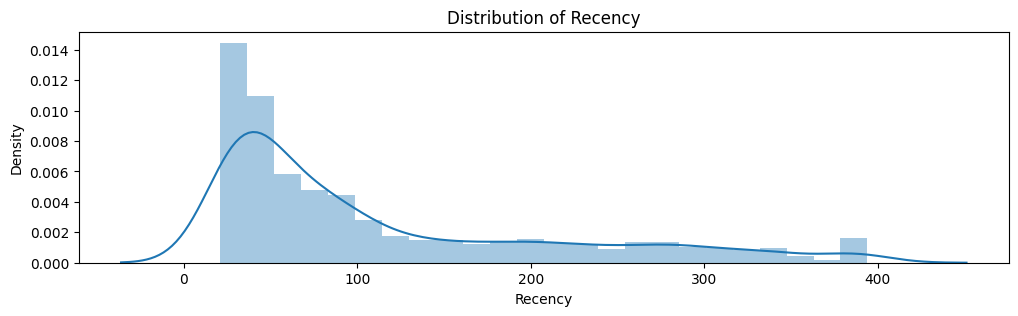

<ipython-input-86-f33b3eba9485>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(segment[col])


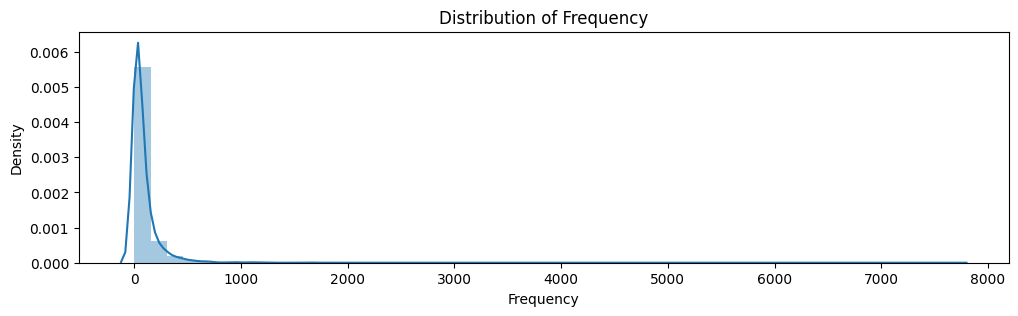

<ipython-input-86-f33b3eba9485>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(segment[col])


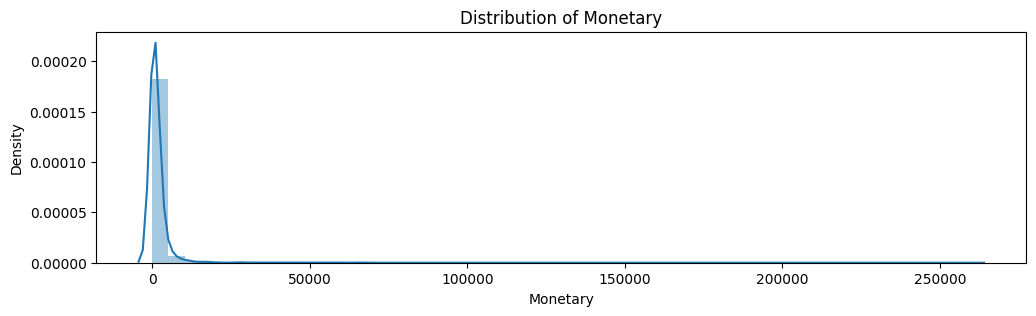

In [ ]:
colnames = ['Recency', 'Frequency', 'Monetary']
import matplotlib.pyplot as plt
import seaborn as sns
for col in colnames:
  fig, ax = plt.subplots(figsize=(12,3))
  sns.distplot(segment[col])
  ax.set_title('Distribution of %s' % col)
  plt.show() # show the chart of Distribution of each score

In [ ]:
grp = segment.groupby('Segment').agg({'CustomerID': 'count',
                                     'Monetary': 'sum',
                                     'Recency': 'mean'}).reset_index()
grp.columns = ['Segment', 'Cust_count', 'Total_monetary', 'Avg_recency']
grp.sort_values(by='Cust_count', ascending=False, inplace=True)
grp

,Segment,Cust_count,Total_monetary,Avg_recency
3,Champions,719,4302192.340,31.696801
4,Hibernating customers,719,274593.672,170.776078
9,Potential Loyalist,460,254171.951,48.960870
5,Lost customers,390,66904.020,296.443590
1,At Risk,388,538115.270,174.791237
6,Loyal,373,847501.770,59.209115
8,New Customers,267,52600.840,50.086142
7,Need Attention,221,307469.820,53.248869
0,About To Sleep,175,49379.670,110.297143
10,Promising,129,314208.240,38.643411


In [ ]:
grp['Count_share'] = grp['Cust_count'] / grp['Cust_count'].sum()
grp['Monetary_share'] = grp['Total_monetary'] / grp['Total_monetary'].sum()
grp # calculate to create the table to show the chart RFM Segments

,Segment,Cust_count,Total_monetary,Avg_recency,Count_share,Monetary_share
3,Champions,719,4302192.340,31.696801,0.183418,0.590553
4,Hibernating customers,719,274593.672,170.776078,0.183418,0.037693
9,Potential Loyalist,460,254171.951,48.960870,0.117347,0.034890
5,Lost customers,390,66904.020,296.443590,0.099490,0.009184
1,At Risk,388,538115.270,174.791237,0.098980,0.073866
6,Loyal,373,847501.770,59.209115,0.095153,0.116335
8,New Customers,267,52600.840,50.086142,0.068112,0.007220
7,Need Attention,221,307469.820,53.248869,0.056378,0.042206
0,About To Sleep,175,49379.670,110.297143,0.044643,0.006778
10,Promising,129,314208.240,38.643411,0.032908,0.043131


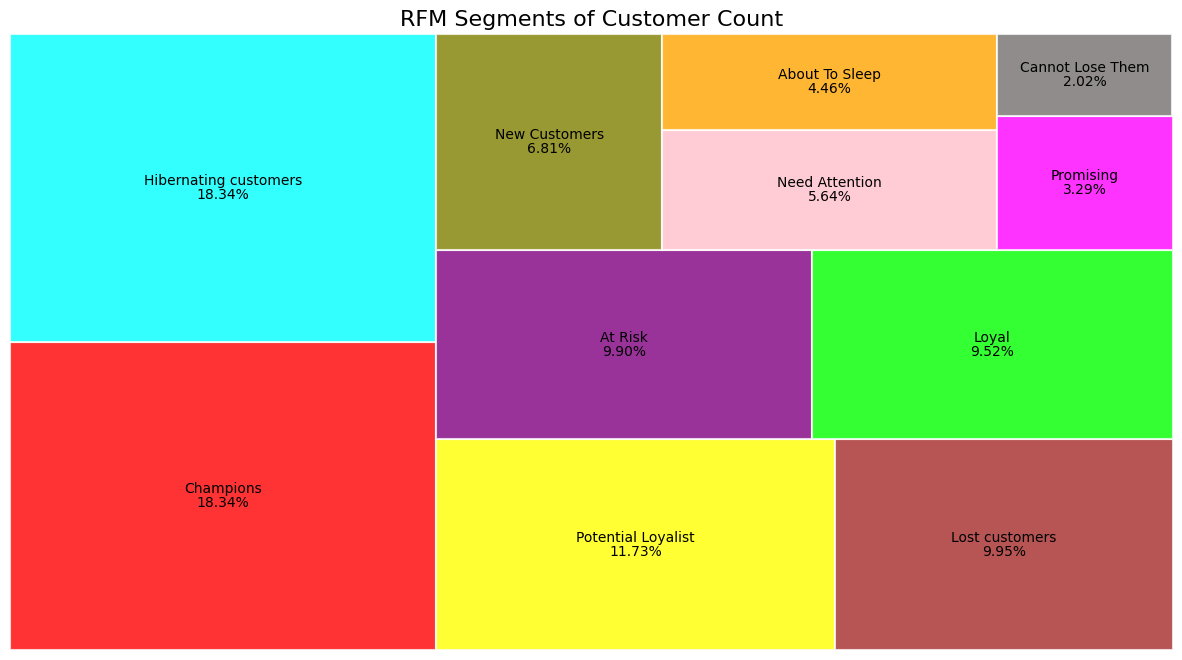

In [ ]:
!pip install squarify
import squarify
import matplotlib.pyplot as plt
colors = ['#FF0000', '#00FFFF', '#FFFF00', '#A52A2A', '#800080', '#00FF00', '#808000', '#FFC0CB', '#FFA500', '#FF00FF', '#736F6E']
fig, ax = plt.subplots(1, figsize = (15,8))
squarify.plot(sizes= grp['Cust_count'],
              label= grp['Segment'],
              value=[f'{x*100:.2f}%' for x in grp['Count_share']],
              alpha=.8,
              color=colors,
              bar_kwargs=dict(linewidth=1.5, edgecolor='white')
              )
plt.title('RFM Segments of Customer Count', fontsize=16)
plt.axis('off')
plt.show() # show the chart RFM Segments of Customer Count